# 붓꽃 데이터 알아보기

이번 경진대회는 세가지 붓꽃의 꽃잎과 꽃받침 길이를 활용하여 꽃잎과 꽃받침의 너비를 알아내는 대회입니다.

기존 너비와 길이가 모두 주어지고 붓꽃의 종류를 예측하는 문제랑은 조금 다르죠?🤣

자 그럼, 대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.


## 붓꽃의 종류

먼저 우리에게 어떤 종류의 붓꽃이 주어졌을까요?

데이터를 열어보신 분들은 아시겠지만 virginica, setosa, virsicolor 이렇게 세종류가 데이터에 들어있습니다.

그럼 각각의 꽃들은 어떻게 생겼을까요?


virginica | setosa | virsicolor
--- | --- | ---
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/800px-Iris_virginica_2.jpg" alt="virginica" width='200' height='200'> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/800px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="setosa" width="200" height="200"> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/800px-Blue_Flag%2C_Ottawa.jpg" alt="virginica" width='200' height='200'> 

차이점이 보이시나요?

일단 색깔부터 차이가 있네요!

그리고 꽃잎, 꽃받침의 길이도 조금씩 다른것 같습니다!

눈으로 보기에는 setosa의 (꽃잎, 꽃받침)길이가 가장 길고 virsicolor의 길이가 가장 짧아보이네요

정말 그런지 확인해볼까요?




image link & license:

[virginica link](https://en.wikipedia.org/wiki/Iris_virginica#/media/File:Iris_virginica_2.jpg) : license CC BY-SA 4.0

[virsicolor link](https://en.wikipedia.org/wiki/Iris_versicolor#/media/File:Blue_Flag,_Ottawa.jpg) : license CC BY-SA 3.0

[setosa link](https://en.wikipedia.org/wiki/Iris_setosa#/media/File:Kosaciec_szczecinkowaty_Iris_setosa.jpg) : license CC BY-SA 3.0

## 패키지 설치

이번 EDA를 시작하기 앞서 필요한 패키지들이 몇가지 있습니다!

pandas, matplotlib, seaborn인데요 아래의 셀을 실행해주세요!

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

## 숫자 확인

이제 본격적으로 우리가 가진 데이터를 분석 해보도록 하겠습니다!

주어진 데이터를 숫자로 확인하고 그 숫자를 눈으로 확인하는 형태로 진행해볼까요?

In [1]:
import pandas as pd # 다운받은 csv를 pandas의 DataFrame 형식으로 불러오기위해 사용합니다.

iris = pd.read_csv('iris_train.csv') # 지금 이 ipynb파일이 있는 폴더에 다운받은 데이터를 함께 넣고 파일 이름을 함수의 인자로 넣어줍니다.

iris.head(10) #10개 데이터 확인

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2
5,5,virginica,6.5,5.8,3.0,2.2
6,6,setosa,4.3,1.1,3.0,0.1
7,7,versicolor,6.7,5.0,3.0,1.7
8,8,versicolor,6.8,4.8,2.8,1.4
9,9,versicolor,6.6,4.4,3.0,1.4


### 평균

가장 기초적인 평균이 있습니다.

각 꽃의 평균 꽃잎과 꽃받침의 길이를 알아볼까요?

In [2]:
sepal_length = iris['sepal length (cm)'] # 꽃받침 길이
petal_length = iris['petal length (cm)'] # 꽃잎의 길이

sum_of_sepal_length = sum(sepal_length) # 꽃받침 길이의 합
sum_of_petal_length = sum(petal_length) # 꽃잎 길이의 합

mean_of_sepal_length = sum_of_sepal_length / len(sepal_length) # 꽃받침 길이의 합 / 총 꽃받침 갯수
mean_of_petal_length = sum_of_petal_length/ len(petal_length) # 꽃잎 길이의 합 / 총 꽃잎 갯수

print('모든 꽃받침의 평균 길이 : ', round(mean_of_petal_length, 3)) # 소숫점 셋째자리 반올림
print('모든 꽃잎의 평균 길이 : ', round(mean_of_sepal_length, 3)) # 소숫점 셋째자리 반올림

모든 꽃받침의 평균 길이 :  4.259
모든 꽃잎의 평균 길이 :  6.044


## 붓꽃 종류별 평균 길이는?

위의 코드에선 종류에 관계없이 꽃받침과 꽃잎의 평균 길이를 알아보았습니다.

이제 붓꽃의 종류마다 어떤 특징을 갖고있는지 알아보겠습니다!

먼저 virginica, setosa, versicolor가 각각 몇개씩 있을까요?

In [3]:
virginica = iris[iris['species'] == 'virginica'] # 전체 붓꽃 데이터에서 virginica만 추출
setosa = iris[iris['species'] == 'setosa'] # 전체 붓꽃 데이터에서 setosa만 추출
versicolor = iris[iris['species'] == 'versicolor'] # 전체 붓꽃 데이터에서 virsicolor만 추출

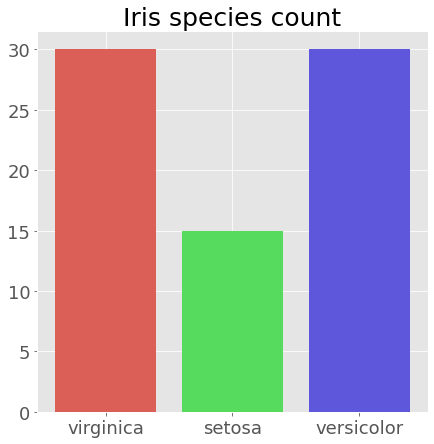

In [4]:
import matplotlib.pyplot as plt # 그래프를 그리기위한 패키지 import
import seaborn as sns # 그래프 패키지

plt.style.use('ggplot') #그래프를 R의 ggplot스타일로 출력해줍니다 순정 matplotlib보다 훨씬 깔끔합니다(?)
plt.figure(figsize=(7, 7)) # 그래프의 사이즈를 설정해줍니다

amount_of_virginica = len(virginica)
amount_of_setosa = len(setosa)
amount_of_versicolor = len(versicolor)

species_count = [amount_of_virginica, amount_of_setosa, amount_of_versicolor]
colors = sns.color_palette('hls',len(species_count))
plt.bar(['virginica', 'setosa', 'versicolor'], species_count, color= colors)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Iris species count', fontsize=25)

plt.show()

데이터셋에는 virginica가 30개, setosa가 15개, versicolor가 30개로 setosa데이터가 가장 적은걸 확인할 수 있습니다.

이제 각 종류의 평균 길이를 구해보도록 하죠

위의 코드셀은 붓꽃의 종류별로 모아 추출하였습니다 이제 이전 평균을 구하는 코드와 같이 작성하면 됩니다

In [5]:
virginica_sepal_length = virginica['sepal length (cm)'] # 꽃받침 길이
virginica_petal_length = virginica['petal length (cm)'] # 꽃잎의 길이

amount_of_virginica = len(virginica)


sum_of_virginica_sepal_length = sum(virginica_sepal_length) # 꽃받침 길이의 합
sum_of_virginica_petal_length = sum(virginica_petal_length) # 꽃잎 길이의 합

mean_of_virginica_sepal_length = sum_of_virginica_sepal_length / len(virginica_sepal_length) # 꽃받침 길이의 합 / 총 꽃받침 갯수
mean_of_virginica_petal_length = sum_of_virginica_petal_length / len(virginica_petal_length) # 꽃잎 길이의 합 / 총 꽃잎 갯수

print('virginica 꽃받침의 평균 길이 : ', round(mean_of_virginica_sepal_length, 3)) # 소숫점 셋째자리 반올림
print('virginica 꽃잎의 평균 길이 : ', round(mean_of_virginica_petal_length, 3)) # 소숫점 셋째자리 반올림

print('\n')

setosa_sepal_length = setosa['sepal length (cm)'] # 꽃받침 길이
setosa_petal_length = setosa['petal length (cm)'] # 꽃잎의 길이

amount_of_setosa = len(setosa) # setosa 총 갯수

sum_of_setosa_sepal_length = sum(setosa_sepal_length) # setosa 꽃받침 길이 총합
sum_of_setosa_petal_length = sum(setosa_petal_length) # setosa 꽃잎 길이 총합

mean_of_setosa_sepal_length = sum_of_setosa_sepal_length / amount_of_setosa # setosa 꽃받침의 평균 길이
mean_of_setosa_petal_length = sum_of_setosa_petal_length / amount_of_setosa# setosa 꽃잎의 평균 길이


print('setosa 꽃받침의 평균 길이 : ', round(mean_of_setosa_petal_length, 3)) # 소숫점 셋째자리 반올림
print('setosa 꽃잎의 평균 길이 : ', round(mean_of_setosa_sepal_length, 3)) # 소숫점 셋째자리 반올림

print('\n')


versicolor_sepal_length = versicolor['sepal length (cm)'] # 꽃받침 길이
versicolor_petal_length = versicolor['petal length (cm)'] # 꽃잎의 길이

amount_of_versicolor = len(versicolor)


sum_of_versicolor_sepal_length = sum(versicolor_sepal_length) # versicolor 꽃받침 길이 총합
sum_of_versicolor_petal_length = sum(versicolor_petal_length) # versicolor 꽃잎 길이 총합

mean_of_versicolor_sepal_length = sum_of_versicolor_sepal_length / amount_of_versicolor # versicolor 꽃받침의 평균 길이
mean_of_versicolor_petal_length = sum_of_versicolor_petal_length / amount_of_versicolor # versicolor 꽃잎의 평균 길이


print('versicolor 꽃받침의 평균 길이 : ', round(mean_of_versicolor_petal_length, 3)) # 소숫점 셋째자리 반올림
print('versicolor 꽃잎의 평균 길이 : ', round(mean_of_versicolor_sepal_length, 3)) # 소숫점 셋째자리 반올림

virginica 꽃받침의 평균 길이 :  6.583
virginica 꽃잎의 평균 길이 :  5.603


setosa 꽃받침의 평균 길이 :  1.42
setosa 꽃잎의 평균 길이 :  4.913


versicolor 꽃받침의 평균 길이 :  4.333
versicolor 꽃잎의 평균 길이 :  6.07


## 우리의 목적

이번 대회의 목적은 꽃받침과 꽃잎의 너비를 예측하는 것입니다.

지금까지 평균 길이를 구한것은 전부 너비를 예측하기위해 힌트로 사용되게 될것입니다.

그럼 이제 전체 평균 길이를 구해보도록 하겠습니다!

In [6]:
sepal_width = iris['sepal width (cm)'] # 꽃받침 길이
petal_width = iris['petal width (cm)'] # 꽃잎의 길이

sum_of_sepal_width = sum(sepal_width) # 꽃받침 길이의 합
sum_of_petal_width = sum(petal_width) # 꽃잎 길이의 합

mean_of_sepal_width = sum_of_sepal_width / len(sepal_width) # 꽃받침 길이의 합 / 총 꽃받침 갯수
mean_of_petal_width = sum_of_petal_width/ len(petal_width) # 꽃잎 길이의 합 / 총 꽃잎 갯수

print('모든 꽃받침의 평균 너비 : ', round(mean_of_sepal_width, 3)) # 소숫점 셋째자리 반올림
print('모든 꽃잎의 평균 너비 : ', round(mean_of_petal_width, 3)) # 소숫점 셋째자리 반올림

모든 꽃받침의 평균 너비 :  2.959
모든 꽃잎의 평균 너비 :  1.384


전체 꽃받침과 꽃잎의 평균 너비를 구해보았습니다!

그렇다면 붓꽃 종류별 평균 너비는 어떨까요?

종류별 평균길이를 구하는 코드와 거의 흡사합니다

In [7]:
## 붓꽃 종류별 꽃받침과 꽃잎의 평균 너비를 구해주세요!

virginica_sepal_width = virginica['sepal width (cm)'] # 꽃받침 길이
virginica_petal_width = virginica['petal width (cm)'] # 꽃잎의 길이

sum_of_virginica_sepal_width = sum(virginica_sepal_width) # virginica 꽃받침 너비 총합
sum_of_virginica_petal_width = sum(virginica_petal_width) # virginica 꽃잎 길이 총합

mean_of_virginica_sepal_width = sum_of_virginica_sepal_width / amount_of_virginica # virginica 꽃받침 평균 너비
mean_of_virginica_petal_width = sum_of_virginica_petal_width / amount_of_virginica # virginica 꽃잎 평균 너비


print('virginica 꽃받침의 평균 너비 : ', round(mean_of_virginica_petal_width, 3)) # 소숫점 셋째자리 반올림
print('virginica 꽃잎의 평균 너비 : ', round(mean_of_virginica_sepal_width, 3)) # 소숫점 셋째자리 반올림


print('\n')

setosa_sepal_width = setosa['sepal width (cm)'] # 꽃받침 길이
setosa_petal_width = setosa['petal width (cm)'] # 꽃잎의 길이


sum_of_setosa_sepal_width = sum(setosa_sepal_width) # setosa 꽃받침 너비 총합
sum_of_setosa_petal_width = sum(setosa_petal_width) # sotasa 꽃잎 너비 총합

mean_of_setosa_sepal_width = sum_of_setosa_sepal_width / amount_of_setosa # setosa 꽃받침 평균 너비
mean_of_setosa_petal_width = sum_of_setosa_petal_width / amount_of_setosa # setosa 꽃잎 평균 너비


print('setosa 꽃받침의 평균 너비 : ', round(mean_of_setosa_petal_width, 3)) # 소숫점 셋째자리 반올림
print('setosa 꽃잎의 평균 너비 : ', round(mean_of_setosa_sepal_width, 3)) # 소숫점 셋째자리 반올림


print('\n')

versicolor_sepal_width = versicolor['sepal width (cm)'] # 꽃받침 길이
versicolor_petal_width = versicolor['petal width (cm)'] # 꽃잎의 길이

sum_of_versicolor_sepal_width = sum(versicolor_sepal_width) # versicolor 꽃받침 너비 총합
sum_of_versicolor_petal_width = sum(versicolor_petal_width) # versicolor 꽃잎 너비 총합

mean_of_versicolor_sepal_width = sum_of_versicolor_sepal_width / amount_of_versicolor # versicolor 꽃받침 평균 너비
mean_of_versicolor_petal_width = sum_of_versicolor_petal_width / amount_of_versicolor # versicolor 꽃잎 평균 너비


print('versicolor 꽃받침의 평균 너비 : ', round(mean_of_versicolor_petal_width, 3)) # 소숫점 셋째자리 반올림
print('versicolor 꽃잎의 평균 너비 : ', round(mean_of_versicolor_sepal_width, 3)) # 소숫점 셋째자리 반올림


virginica 꽃받침의 평균 너비 :  2.007
virginica 꽃잎의 평균 너비 :  2.933


setosa 꽃받침의 평균 너비 :  0.2
setosa 꽃잎의 평균 너비 :  3.347


versicolor 꽃받침의 평균 너비 :  1.353
versicolor 꽃잎의 평균 너비 :  2.79


## 너비와 길이의 비율은?

자 이제 모든 붓꽃 종류에대해 꽃받침, 꽃잎의 길이와 너비를 구해보았습니다.

구한 자료를 바탕으로 무엇을 알아낼 수 있을까요?

우선 생각나는건 너비와 길이의 비율입니다.

꽃받침의 너비와 길이의 비율, 꽃잎의 너비와 비율은 어떻게될까요?

In [8]:
sepal_length_over_width = mean_of_sepal_length / mean_of_sepal_width #꽃받침의 길이에 대한 너비의 비율
petal_length_over_width = mean_of_petal_length / mean_of_petal_width #꽃잎의 길이에 대한 너비의 비율

print('꽃받침의 길이에 대한 너비의 비율 : ', sepal_length_over_width)
print('꽃잎의 길이에 대한 너비의 비율 : ', petal_length_over_width)

꽃받침의 길이에 대한 너비의 비율 :  2.0428120775123926
꽃잎의 길이에 대한 너비의 비율 :  3.077071290944124


전체적인 비율은 꽃받침의 길이가 너비보다 약 두배, 꽃잎의 길이가 너비보다 약 세배정도 큰것을 확인할 수 있습니다.

정말 그럴까요?

이번에는 전체적인 평균을 알아내기보다는 데이터 하나하나에 집중해보도록 하겠습니다.


우선 좀전에 구해보았던 비율을 전체 길이에 나누어 너비를 구하고 각 데이터마다 에러가 얼마나 발생하는지 볼것입니다.

우리의 목적은 길이와 종류를 이용하여 너비를 구하는것이었으니까요!

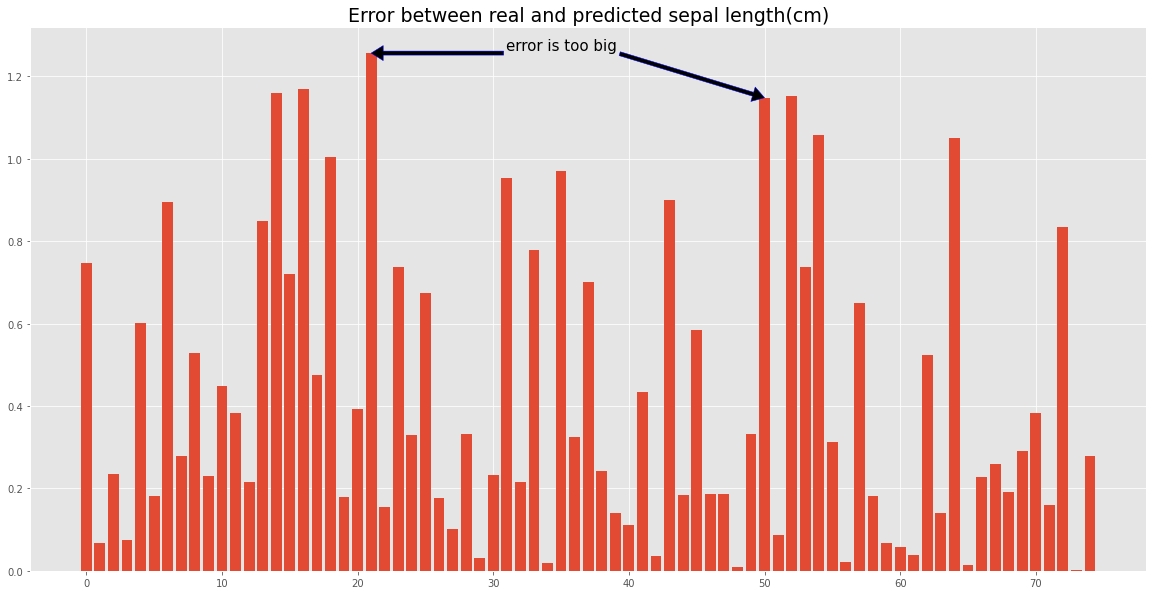

In [9]:
import matplotlib.pyplot as plt # 그래프를 그리기위한 패키지 import

sepal_width_pred = sepal_length / sepal_length_over_width

error = [abs(true - pred) for true, pred in zip(sepal_width, sepal_width_pred)]

plt.figure(figsize=(20, 10)) # 그래프의 사이즈를 설정해줍니다

plt.bar(x=range(len(error)), height = error) # bar그래프를 그립니다.

plt.title('Error between real and predicted sepal length(cm)', fontsize = 19) #그래프의 제목을 설정합니다.

arrowprops = {
              'facecolor' : 'black', 
              'edgecolor':'b', 
              'headwidth' : 15,
              'shrink': 1
              }
plt.annotate('error is too big', ha = 'center', va = 'bottom', xytext = (35, max(error)),
            xy = (21, max(error)),
            fontsize = 15,
            arrowprops = arrowprops
            )
plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (39, max(error)),
            xy = (50, error[50]),
            fontsize = 15,
            arrowprops = arrowprops
            )
plt.show()


위의 그래프는 꽃받침 너비를 길이와의 비율로 예측한 값과 실제값의 차이입니다.

막대가 길면 길수록 그 차이는 크고 잘못 예측했다고 이야기할 수 있겠죠

물론 1번째 값과 29번째값은 오차가 거의 없지만 좋은 예측이라고 하기에는 20번째 값과 50번째값 등 오차가 굉장히 많이 벌어지는것을 확인할 수 있습니다.


## 2차원 그래프

길이와 너비는 어떠한 상관관계를 가질까요? 눈으로 확인해보겠습니다

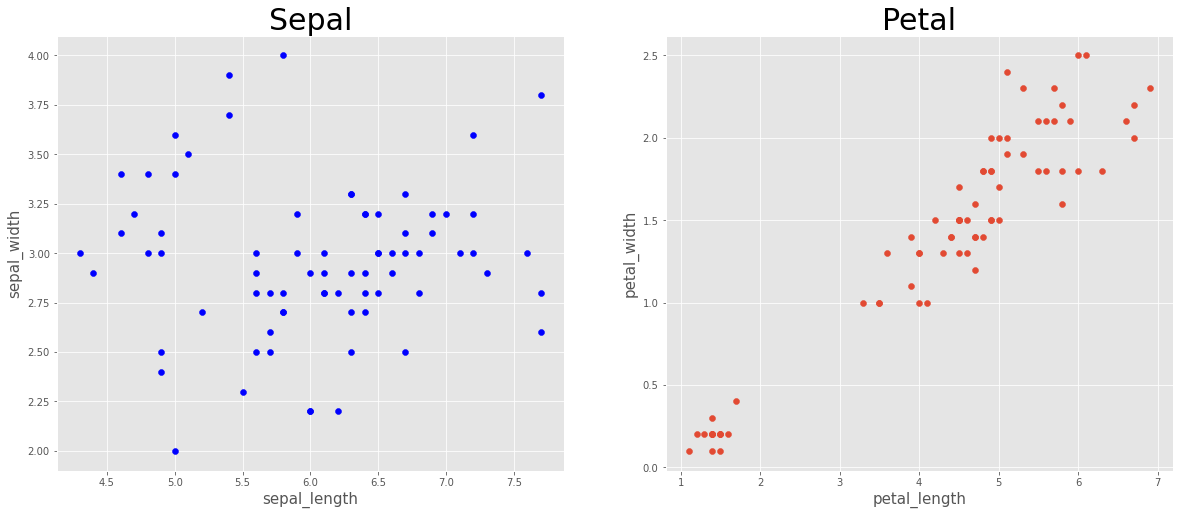

In [10]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.scatter(sepal_length, sepal_width, color='b')
plt.xlabel('sepal_length', fontsize=15)
plt.ylabel('sepal_width', fontsize=15)
plt.title('Sepal', fontsize = 30)


plt.subplot(1,2,2)
plt.scatter(petal_length, petal_width)
plt.xlabel('petal_length', fontsize=15)
plt.ylabel('petal_width', fontsize=15)
plt.title('Petal', fontsize = 30)

plt.show()

꽃받침은 길이와 너비의 관계가 분명하게 보이지는 않는것같습니다.

하지만 꽃잎은 어떤가요? 꽃잎의 길이가 길어지면 길어질수록 꽃받침의 너비도 명확하게 증가하는 경향을 보입니다!

종류별로도 한번 나누어보겠습니다!

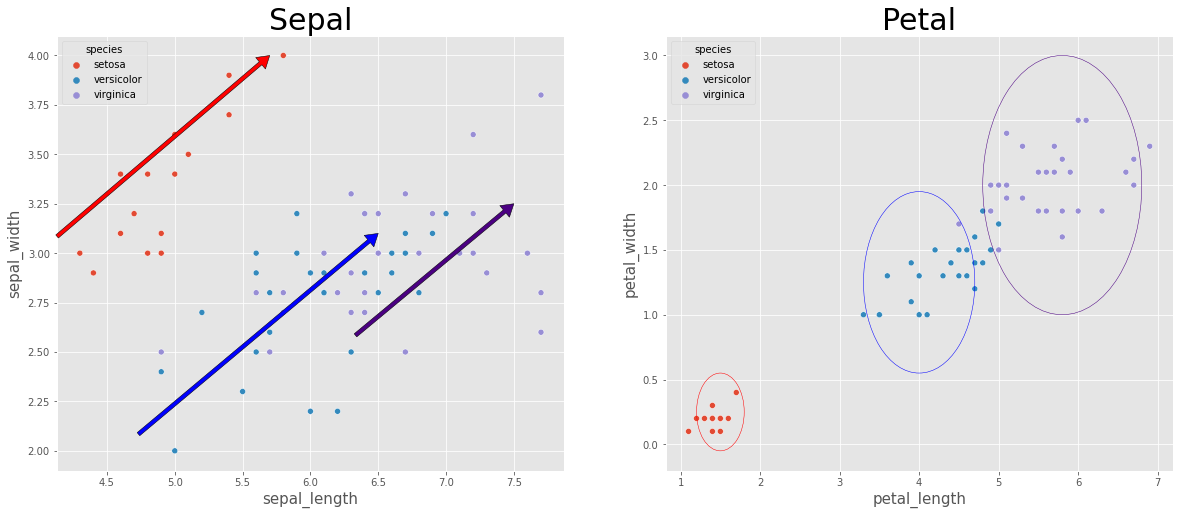

In [11]:
import seaborn as sns

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.scatterplot(x = iris['sepal length (cm)'], 
                y =iris['sepal width (cm)'],
                hue = iris['species'],
                )
plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (4.1, 3.0),
            xy = (5.7, 4),
            fontsize = 15,
            arrowprops = {
              'facecolor' : 'r', 
              'edgecolor':'black', 
              'headwidth' : 15,
              'shrink': 1
              }
            )

plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (4.7, 2.0),
            xy = (6.5, 3.1),
            fontsize = 15,
            arrowprops = {
              'facecolor' : 'b', 
              'edgecolor':'black', 
              'headwidth' : 15,
              'shrink': 1
              }
            )

plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (6.3, 2.5),
            xy = (7.5, 3.25),
            fontsize = 15,
            arrowprops =  {
              'facecolor' : 'indigo', 
              'edgecolor':'black', 
              'headwidth' : 15,
              'shrink': 1
              }
            )

plt.xlabel('sepal_length', fontsize=15)
plt.ylabel('sepal_width', fontsize=15)
plt.title('Sepal', fontsize = 30)


plt.subplot(1,2,2)
sns.scatterplot(x = iris['petal length (cm)'], 
                y =iris['petal width (cm)'],
                hue = iris['species'],
                )
plt.xlabel('petal_length', fontsize=15)
plt.ylabel('petal_width', fontsize=15)
plt.title('Petal', fontsize = 30)

plt.gca().add_patch(plt.Circle((1.5, 0.25), .3, color = 'r', fill=False))
plt.gca().add_patch(plt.Circle((4, 1.25), .7, color = 'b', fill=False))
plt.gca().add_patch(plt.Circle((5.8, 2), 1, color = 'indigo', fill=False))

plt.show()

꽃의 종류별로 보니 꽃받침의 길이도 너비와 어느정도 양의 상관관계가 있어보이는것 같습니다.

꽃잎의 길이와 너비의 관계역시 종류별로 세가지 군집을 형성하며 우상향하는것을 볼 수 있습니다!

## 3차원 그래프

2차원 평면만으로는 조금 재미가 없죠? 이번엔 3차원 그래프로 확인해보겠습니다

먼저 전체 꽃받침과 꽃잎의 길이로 너비들을 각각 출력해보겠습니다



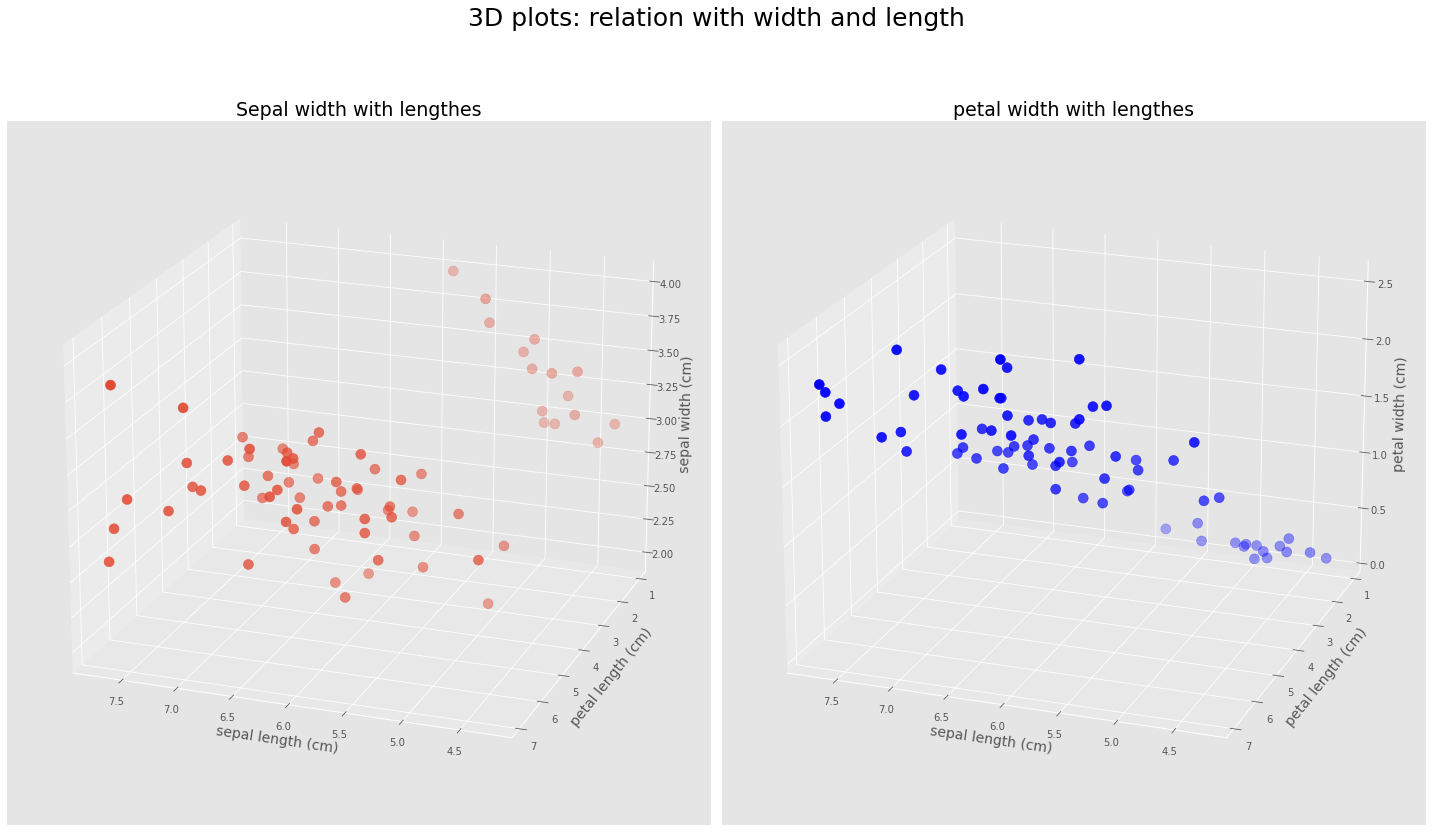

In [101]:
fig = plt.figure(figsize = (20, 13))
fig.suptitle('3D plots: relation with width and length', fontsize = 25)

ax = fig.add_subplot(1, 2, 1,projection = '3d')

ax.view_init(20,  110)
ax.set_title('Sepal width with lengthes', fontsize = 19)
ax.scatter(iris['sepal length (cm)'], iris['petal length (cm)'], iris['sepal width (cm)'], s=100)
ax.set_xlabel('sepal length (cm)', fontsize=14)
ax.set_ylabel('petal length (cm)', fontsize=14)
ax.set_zlabel('sepal width (cm)', fontsize =14)

ax_2 = fig.add_subplot(1, 2, 2, projection = '3d')

ax_2.view_init(20,  110)
ax_2.set_title('petal width with lengthes', fontsize = 19)
ax_2.scatter(iris['sepal length (cm)'], iris['petal length (cm)'], iris['petal width (cm)'], s=100, color = 'b')
ax_2.set_xlabel('sepal length (cm)', fontsize=14)
ax_2.set_ylabel('petal length (cm)', fontsize=14)
ax_2.set_zlabel('petal width (cm)', fontsize =14)

fig.tight_layout()


2차원 평면보다 더 나은 특징을 관찰할 수 있으신가요?

저는 잘 모르겠어요🤣

꽃잎의 너비는 꽃받침과 꽃잎의 길이가 길어질수록 너비도 넓어진다는것을 얼추 확인할 수 있는것 같습니다! 하지만 다른 특이점은 찾기 힘든것같습니다

이번엔 종류별로 나눠볼까요??

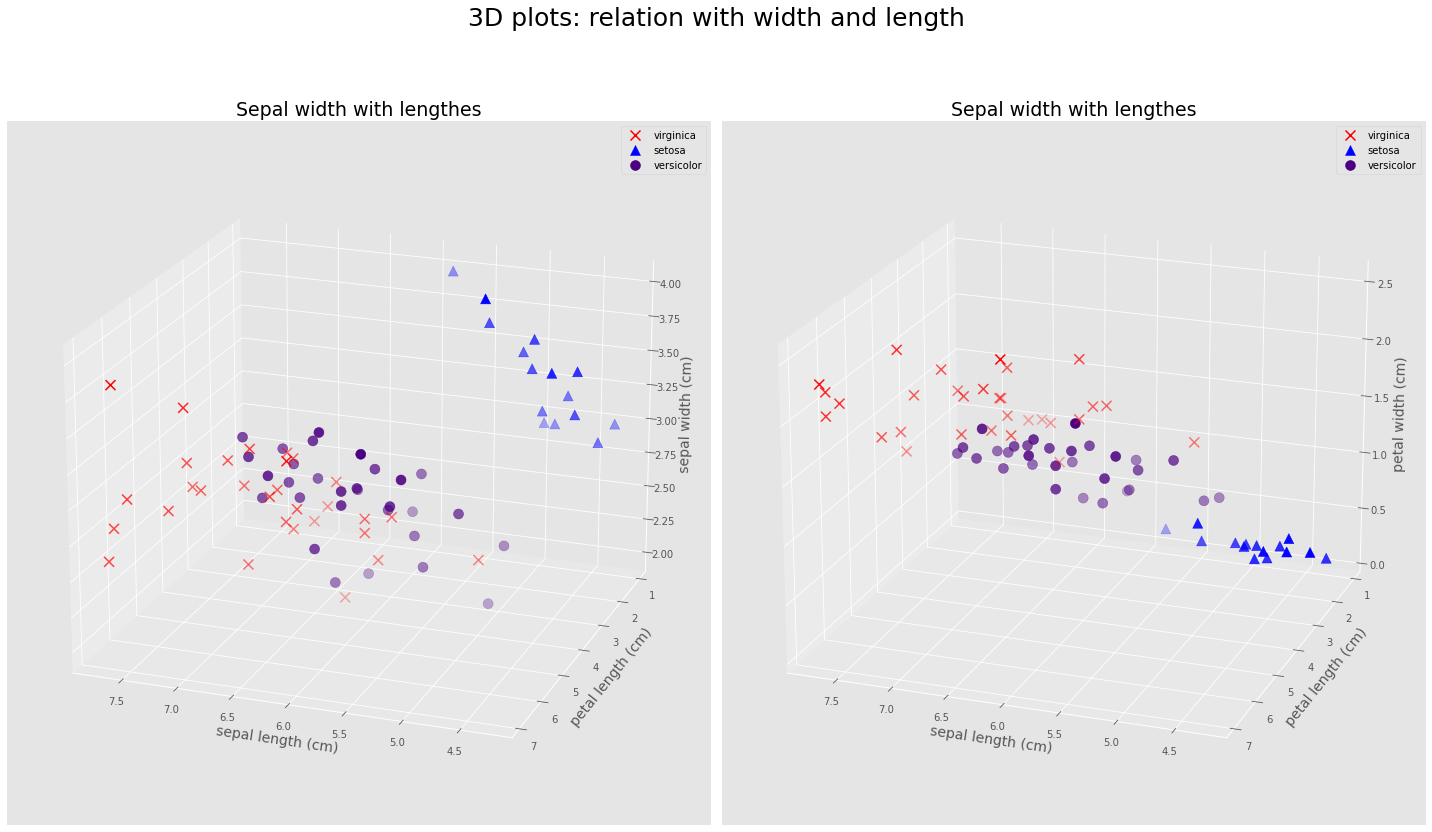

In [105]:
fig = plt.figure(figsize = (20, 13))
fig.suptitle('3D plots: relation with width and length', fontsize = 25)

ax = fig.add_subplot(1, 2, 1,projection = '3d')

ax.view_init(20,  110)
ax.set_title('Sepal width with lengthes', fontsize = 19)
ax.scatter(virginica['sepal length (cm)'], virginica['petal length (cm)'], virginica['sepal width (cm)'], s=100, color='r', marker= 'x', label= 'virginica')
ax.scatter(setosa['sepal length (cm)'], setosa['petal length (cm)'], setosa['sepal width (cm)'], s=100, color='b', marker= '^', label= 'setosa')
ax.scatter(versicolor['sepal length (cm)'], versicolor['petal length (cm)'], versicolor['sepal width (cm)'], s=100, color='indigo', marker= 'o', label= 'versicolor')
ax.set_xlabel('sepal length (cm)', fontsize=14)
ax.set_ylabel('petal length (cm)', fontsize=14)
ax.set_zlabel('sepal width (cm)', fontsize =14)
ax.legend()

ax_2 = fig.add_subplot(1, 2, 2, projection = '3d')

ax_2.view_init(20,  110)
ax_2.set_title('petal width with lengthes', fontsize = 19)
ax_2.set_title('Sepal width with lengthes', fontsize = 19)
ax_2.scatter(virginica['sepal length (cm)'], virginica['petal length (cm)'], virginica['petal width (cm)'], s=100, color='r', marker= 'x', label= 'virginica')
ax_2.scatter(setosa['sepal length (cm)'], setosa['petal length (cm)'], setosa['petal width (cm)'], s=100, color='b', marker= '^', label= 'setosa')
ax_2.scatter(versicolor['sepal length (cm)'], versicolor['petal length (cm)'], versicolor['petal width (cm)'], s=100, color='indigo', marker= 'o', label= 'versicolor')
ax_2.set_xlabel('sepal length (cm)', fontsize=14)
ax_2.set_ylabel('petal length (cm)', fontsize=14)
ax_2.set_zlabel('petal width (cm)', fontsize =14)
ax_2.legend()

fig.tight_layout()


종류를 표시하니 2차원 평면에서 확인했던것과 마찬가지로 군집을 형성하고 잇는것을 확인할 수 있습니다!

하지만 3차원 그래프를 통해서 엄청난 인사이트를 얻지는 못한것 같습니다.

사실 여러분이 보고계신 위의 그래프틑 3차원이 아닌 2차원이기 때문인데요 

정말로 3차원 3d그래프를 확인하고 싶으신 분들은 아래의 코드셀을 개인 컴퓨터에서 실행시켜주세요! 

여러분이 직접 값을 확인할수도, 줌인과 줌아웃을 할 수도 있을겁니다!

In [ ]:
!pip install plotly # 여러분에게 더욱 fancy한 그래프를 선사해줄 패키지입니다!

In [ ]:
import plotly.express as px

fig = px.scatter_3d(iris, x='sepal length (cm)', y='petal length (cm)', z='petal width (cm)',
              color='species')
fig.update_layout(title='꽃받침 너비', autosize=False,
                  width=700, height=700,
                 )
fig.show()

In [ ]:
fig = px.scatter_3d(iris, x='sepal length (cm)', y='petal length (cm)', z='sepal width (cm)',
              color='species')
fig.update_layout(title='꽃잎 너비', autosize=False,
                  width=700, height=700,
                 )
fig.show()

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!

그럼 이만!!